In [10]:
### Import Libraries
import pandas as pd
import datetime
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pprint import pprint
import re
from sqlalchemy import create_engine
import sqlite3
from sqlite3 import Error
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [16]:
### Create connection to SQL db and create extraction function

# Define function to create connection to database
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

def extract_query(query, database):
    conn = create_connection(database)

    # Extract table from database based on query
    if conn is not None:
        df = pd.read_sql(query, con = conn)
    else:
        print("Error! cannot create the database connection.")
    return df
        
    

In [28]:
### Read Daily Attendance Grade from SQL

database = r"C:\users\kyled\documents\github\zoomengagement\zoom_database.db"

start_date = datetime.date(2020,3,24)
delta = datetime.timedelta(days = 1)
end_date = datetime.date(2020,3,27)
#n_dates = range(delta)

date = start_date

del daily_attendance

while date <= end_date:
    
    query_daily = """WITH attendance (obs_id, date, present) AS (
        SELECT obs_id, date,
        CASE
            WHEN result = 'Y' THEN 'P'
            WHEN result = 'N' THEN 'P'
            WHEN result = 'A' THEN 'A'
            ELSE 'P'
        END AS present
        FROM observations
        )

        SELECT attendance.date, attendance.present, count(attendance.present)
        FROM attendance
        WHERE attendance.date = '{} 00:00:00'
        GROUP BY attendance.present
        """.format(date)
    
    df_temp = extract_query(query_daily, database)  
    try:
        if daily_attendance is None:
            print("Yeah!")
    except NameError:
        print("Creating Data Frame!")
        daily_attendance = df_temp
        daily_attendance[date] = daily_attendance['count(attendance.present)']
        print(daily_attendance.head())
    else:
        daily_attendance.index = df_temp.index
        daily_attendance[date] = df_temp['count(attendance.present)']
        print(daily_attendance.head())
    
    date = date + delta

daily_attendance = daily_attendance.fillna(0)
daily_attendance = daily_attendance.drop(columns = ['date','count(attendance.present)']).fillna(0)

daily_attendance.head()


Creating Data Frame!
                  date present  count(attendance.present)  2020-03-24
0  2020-03-24 00:00:00       P                        683         683


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [ ]:
### Read Weekly Attendance Grade from SQL



In [23]:
### Create Report re: Daily Attendance

plt.figure()
sns.set_style("dark")
plt.pie(x = daily_attendance['count(attendance.present)'], autopct = '%d%%')
plt.legend(daily_attendance['present'])
plt.title('Zoom Attendance')
plt.show()


KeyError: 'count(attendance.present)'

<Figure size 432x288 with 0 Axes>

range(0, 4)
['A' 7 30.0 30.0 6]


TypeError: unhashable type: 'numpy.ndarray'

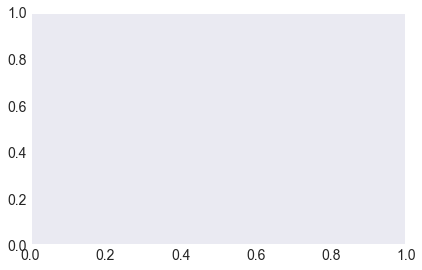

In [126]:
### Create Report re: Weekly Attendance

x_label = daily_attendance.columns[1:].values
y_label = daily_attendance[daily_attendance.present == 'A'].values
x_values = range(len(x_label))
print(x_values)
print(y_label[0])
plt.plot(x_values, y_label)
